# Assigments 3.1

Quentin Le Roux

This first part of the assignment requires to implement yourself basic cross-validation strategies.

In [1]:
# Library imports

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

<hr>

## Exercise 1

Define a 10-fold classification strategy to test the accuracy of a Linear Discriminant Analysis (LDA) classifier for the data created as follows:

In [2]:
# Global variable declaration

folds = 10
n_samples = 100
n_features = 2

In [3]:
# Dataset generation

X, y = make_classification(n_samples=n_samples, 
                           n_features=n_features, 
                           n_redundant=0, 
                           n_informative=2,
                           random_state=0, 
                           n_clusters_per_class=1, 
                           weights = [0.5])

We test a simple LDA analysis with a 10-fold cross-validation analysis as a preamble.

In [4]:
# Model declaration & Cross-Validation process

model = LinearDiscriminantAnalysis()
sklearn_accuracy = cross_val_score(model, 
                                   X, y, 
                                   scoring = 'accuracy', 
                                   cv=folds)

In [5]:
# Prints results

print(f"The accuracies yielded by a {folds}-fold cross-validation process are:",
      f"{sklearn_accuracy}", sep="\n")
print(f"\nThe average accuracy yielded by a {folds}-fold cross validation process is:",
      f"{np.mean(sklearn_accuracy):.2f}", sep="\n")

The accuracies yielded by a 10-fold cross-validation process are:
[0.9 1.  1.  0.9 1.  1.  1.  1.  0.9 0.7]

The average accuracy yielded by a 10-fold cross validation process is:
0.94


Next, given a 10-fold cross validation, we are looking for the best mix of hyperparameters for the LDA model. As such, we perform a grid search over the model.

In [6]:
# Global variable declaration

solvers = ["svd", "lsqr", "eigen"]
n_components = [None] + list(range(n_features))
n_items = np.array(list(range(len(solvers)*len(n_components))))

Mean_Acc = []
Std_Acc = []

In [7]:
# Pseudo-Grid Search over solver and n_component parameters

for solv in solvers:
    for comp in n_components:
        # Model declaration
        model = LinearDiscriminantAnalysis(solver=solv, 
                                           n_components=comp)
        # Computes cross-validation accuracies
        sklearn_accuracy = cross_val_score(model, 
                                           X, y, 
                                           scoring = 'accuracy', 
                                           cv=folds)
        # Records results
        Mean_Acc.append(np.mean(sklearn_accuracy))
        Std_Acc.append(np.sqrt(np.var(sklearn_accuracy)))

# Formats
Mean_Acc = np.asarray(Mean_Acc)
Std_Acc = np.asarray(Std_Acc)

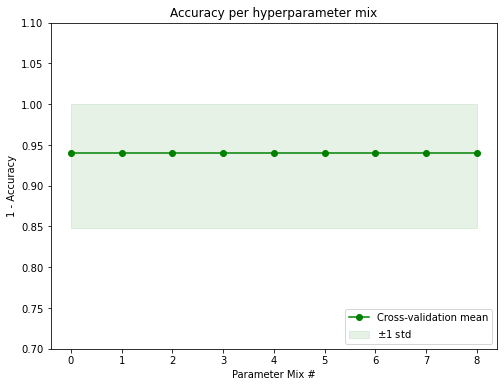

In [8]:
#Plots results

fig = plt.figure(figsize=(8,6))

plt.fill_between(n_items, 
                 Mean_Acc - Std_Acc,
                 1, #Accuracy cannot go above 1
                 alpha=0.1, 
                 color="g", 
                 label = '$\pm 1$ std')

plt.plot(n_items, 
         Mean_Acc, 
         'o-', 
         color="g",
         label="Cross-validation mean")

plt.ylim(0.7,1.1)
plt.ylabel('1 - Accuracy')
plt.xlabel('Parameter Mix #')

plt.legend(loc="lower right")
plt.title('Accuracy per hyperparameter mix')

plt.show()

We see that for all hyperparameter mixes, we get the same results.

<hr>

## Exercise 2

Use the previous 10-fold cross-validation to plot and compute the average area under the curve of the LDA classifier. You can use the built in method *predict_proba(X)*

In [9]:
# Global variable declaration

roc_sample = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

In [10]:
# Model declaration

model = LinearDiscriminantAnalysis()

We remark that we may be facing a case of unbalanced dataset when performing a train-test split. As such k-fold cross-validation may pose problems of biased accuracy quantification.

In [11]:
# Testing consistent split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print("*** Training ***")
print("Elements of class 0: " + str(np.sum(y_train==0)/len(y_train)))
print("Elements of class 1: " + str(np.sum(y_train==1)/len(y_train)))

print("\n*** Testing ***")
print("Elements of class 0: " + str(np.sum(y_test==0)/len(y_test)))
print("Elements of class 1: " + str(np.sum(y_test==1)/len(y_test)))

print("\n*** Training + Testing ***")
print("Elements of class 0: " + str(np.sum(y==0)/len(y)))
print("Elements of class 1: " + str(np.sum(y==1)/len(y)))

*** Training ***
Elements of class 0: 0.52
Elements of class 1: 0.48

*** Testing ***
Elements of class 0: 0.48
Elements of class 1: 0.52

*** Training + Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5


The classes are not equally represented in in the dataset (and especially between potential training and testing sets). 

This will likely carry over to any type of Training and Testing split. This may pose a problem in the evaluation of our LDA model as the performance is not evaluated on data with same distribution. 

For this reason, we would like to keep the proportion of classes constant across data split. This operation is called stratified k-fold.

In [12]:
# Testing consistent split using SKF

skf = StratifiedKFold(n_splits=folds)
for idx, (train, test) in enumerate(skf.split(X, y)):
    print(f"\n##### Example with fold-mix #{idx} #####")
    print("\n*** Training ***")
    print("Elements of class 0: " + str(np.sum(y[train]==0)/len(y[train])))
    print("Elements of class 1: " + str(np.sum(y[train]==1)/len(y[train])))
    print("*** Testing ***")
    print("Elements of class 0: " + str(np.sum(y[test]==0)/len(y[test])))
    print("Elements of class 1: " + str(np.sum(y[test]==1)/len(y[test])))


##### Example with fold-mix #0 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #1 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #2 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #3 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #4 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #5 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 

In [13]:
# StratifiedKFold strategy object declaration

cv = StratifiedKFold(n_splits=folds)

Test Accuracy Scores for each fold using the StratifiedKFold method:

0-Fold Test Accuracy Score: 0.90
1-Fold Test Accuracy Score: 1.00
2-Fold Test Accuracy Score: 1.00
3-Fold Test Accuracy Score: 0.90
4-Fold Test Accuracy Score: 1.00
5-Fold Test Accuracy Score: 1.00
6-Fold Test Accuracy Score: 1.00
7-Fold Test Accuracy Score: 1.00
8-Fold Test Accuracy Score: 0.90
9-Fold Test Accuracy Score: 0.70

AUC plot:


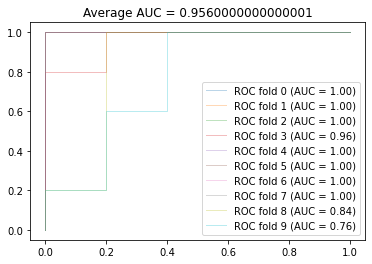

In [14]:
# Cross-validation loop: runs LDA with cross-validation and plot ROC curves
# Loops over the cross-validation folds

print("Test Accuracy Scores for each fold using the StratifiedKFold method:\n")

for train, test in cv.split(X, y):
    # Computes the predictions
    predictions = model.fit(X[train], y[train]).predict_proba(X[test])
    # Computes the ROC and AUC data
    fpr, tpr, thresholds = roc_curve(y[test], predictions[:, 1])
    roc_sample.append(np.interp(mean_fpr, fpr, tpr))
    # ROC curve is set to start at 0
    roc_sample[-1][0] = 0.0
    # Computes the AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plots the AUC
    plt.plot(fpr, tpr, 
             lw=1, alpha=0.3,
             label=f"ROC fold {i} (AUC = {roc_auc:.2f})")
    # Prints the Accuracy score
    acc = accuracy_score(y[test], model.predict(X[test]))
    print(f"{i}-Fold Test Accuracy Score: {acc:.2f}")
    i += 1

print("\nAUC plot:")
plt.legend()
plt.title("Average AUC = " + str(np.mean(aucs)))
plt.show()

We summarize the cross-validation results using a Receiving Operator Characteristic (ROC) curve.

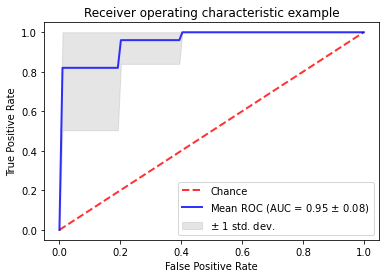

In [15]:
# Summarizes the cross-validation results

# Adds diagonal line of random classification 
plt.plot([0, 1], [0, 1], 
         linestyle='--', 
         lw=2, 
         color='r',
         label='Chance', 
         alpha=.8)

# Computes mean and std for the curves
mean_tpr = np.mean(roc_sample, axis=0)
std_tpr = np.std(roc_sample, axis=0)

# Sets the end point of the average ROC to be equal to 1
mean_tpr[-1] = 1.0

# Computes the AUC of the average curves
mean_auc = auc(mean_fpr, mean_tpr)

# Computes the std of the AUCs 
std_auc = np.std(aucs)

# Plots the ROC curve
plt.plot(mean_fpr, 
         mean_tpr, 
         color='b',
         label=f"Mean ROC (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})",
         lw=2, 
         alpha=.8)


# Plots the std
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, 
                 tprs_lower, 
                 tprs_upper, 
                 color='grey', 
                 alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<hr>

## Exercise 3

Define the appropriate cross-validation strategy and measurement of the area under the curve for the data:

In [16]:
# Global variable declaration

n_samples = 200
n_features = 5

means = [] 
stdevs = []

fold_range = np.array(list(range(2,
                                 min(np.sum(y == 0), 
                                     np.sum(y == 1)))))

roc_sample = [[],[]]
aucs = [[],[]]
mean_fpr = np.linspace(0, 1, n_samples)

In [17]:
# Dataset generation

X, y = make_classification(n_samples=n_samples, 
                           n_features=n_features, 
                           n_redundant=0, 
                           n_informative=3,
                           random_state=0, 
                           n_clusters_per_class=1, 
                           weights = [0.9])

We remark that we may be facing a case of unbalanced dataset when performing a train-test split. As such k-fold cross-validation may pose problems of biased accuracy quantification.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("*** Training ***")
print("Elements of class 0: " + str(np.sum(y_train==0)/len(y_train)))
print("Elements of class 1: " + str(np.sum(y_train==1)/len(y_train)))

print("\n*** Testing ***")
print("Elements of class 0: " + str(np.sum(y_test==0)/len(y_test)))
print("Elements of class 1: " + str(np.sum(y_test==1)/len(y_test)))

print("\n*** Training + Testing ***")
print("Elements of class 0: " + str(np.sum(y==0)/len(y)))
print("Elements of class 1: " + str(np.sum(y==1)/len(y)))

*** Training ***
Elements of class 0: 0.9125
Elements of class 1: 0.0875

*** Testing ***
Elements of class 0: 0.875
Elements of class 1: 0.125

*** Training + Testing ***
Elements of class 0: 0.905
Elements of class 1: 0.095


The classes are not equally represented in in the dataset (and especially between potential training and testing sets). 

This will likely carry over to any type of Training and Testing split. This may pose a problem in the evaluation of our LDA model as the performance is not evaluated on data with same distribution. 

For this reason, we would like to keep the proportion of classes constant across data split. This operation is called stratified k-fold.

In [19]:
skf = StratifiedKFold(n_splits=folds)

for idx, (train, test) in enumerate(skf.split(X, y)):
    print(f"\n##### Example with fold-mix #{idx} #####")
    print("\n*** Training ***")
    print("Elements of class 0: " + str(np.sum(y[train]==0)/len(y[train])))
    print("Elements of class 1: " + str(np.sum(y[train]==1)/len(y[train])))
    print("*** Testing ***")
    print("Elements of class 0: " + str(np.sum(y[test]==0)/len(y[test])))
    print("Elements of class 1: " + str(np.sum(y[test]==1)/len(y[test])))


##### Example with fold-mix #0 #####

*** Training ***
Elements of class 0: 0.9
Elements of class 1: 0.1
*** Testing ***
Elements of class 0: 0.95
Elements of class 1: 0.05

##### Example with fold-mix #1 #####

*** Training ***
Elements of class 0: 0.9055555555555556
Elements of class 1: 0.09444444444444444
*** Testing ***
Elements of class 0: 0.9
Elements of class 1: 0.1

##### Example with fold-mix #2 #####

*** Training ***
Elements of class 0: 0.9055555555555556
Elements of class 1: 0.09444444444444444
*** Testing ***
Elements of class 0: 0.9
Elements of class 1: 0.1

##### Example with fold-mix #3 #####

*** Training ***
Elements of class 0: 0.9055555555555556
Elements of class 1: 0.09444444444444444
*** Testing ***
Elements of class 0: 0.9
Elements of class 1: 0.1

##### Example with fold-mix #4 #####

*** Training ***
Elements of class 0: 0.9055555555555556
Elements of class 1: 0.09444444444444444
*** Testing ***
Elements of class 0: 0.9
Elements of class 1: 0.1

##### Example

Given this observation, we need to devise a k-fold cross validation strategy that can perform on such an imbalanced dataset (along with its potentially imbalanced fold-splits).

In [20]:
# Model declaration & Cross-Validation process

print("##### Mean test accuracies per fold #####")
print("### (with Stratified K-Fold strategy) ###\n")

for k in fold_range:
    
    # Resets list at start of loop
    accuracies_within_fold = []
    
    # Declares the stratified folding
    skf = StratifiedKFold(n_splits=k)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Fit model on X_train
        model = LinearDiscriminantAnalysis()
        model.fit(X_train,y_train)

        #Store each Kfold accuracy values on X_test
        accuracies_within_fold.append(accuracy_score(y_test, model.predict(X_test)))
    
    print(f"{k}-fold cross-validation score: {np.mean(accuracies_within_fold):.2f}")
    
    #Average and std for a particular k fold
    means.append(np.mean(accuracies_within_fold))
    stdevs.append(np.sqrt(np.var(accuracies_within_fold, ddof = 1)))


# Formats
means  = np.asarray(means)
stdevs  = np.asarray(stdevs)

##### Mean test accuracies per fold #####
### (with Stratified K-Fold strategy) ###

2-fold cross-validation score: 0.97
3-fold cross-validation score: 0.97
4-fold cross-validation score: 0.97
5-fold cross-validation score: 0.97
6-fold cross-validation score: 0.97
7-fold cross-validation score: 0.97
8-fold cross-validation score: 0.97
9-fold cross-validation score: 0.97
10-fold cross-validation score: 0.97
11-fold cross-validation score: 0.97
12-fold cross-validation score: 0.97
13-fold cross-validation score: 0.97
14-fold cross-validation score: 0.97
15-fold cross-validation score: 0.97
16-fold cross-validation score: 0.97
17-fold cross-validation score: 0.97
18-fold cross-validation score: 0.97
19-fold cross-validation score: 0.97
20-fold cross-validation score: 0.97
21-fold cross-validation score: 0.97
22-fold cross-validation score: 0.97
23-fold cross-validation score: 0.97
24-fold cross-validation score: 0.97
25-fold cross-validation score: 0.97
26-fold cross-validation score: 0.9

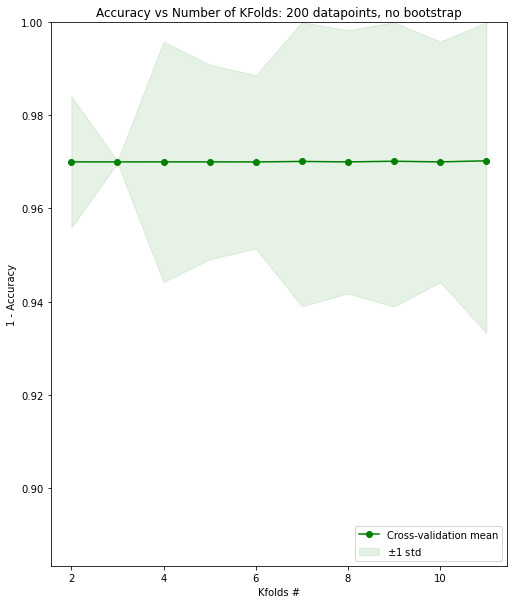

In [25]:
#Plots results for the first 20 folds

fig = plt.figure(figsize=(18,10))
fig.add_subplot(1, 2, 1)

plt.fill_between(fold_range[:10], 
                 means[:10] - stdevs[:10],
                 np.array(list(map(lambda x: 1 if x>1 else x,
                                   means[:10] + stdevs[:10]))), #Accuracy cannot go above 1
                 alpha=0.1, 
                 color="g", 
                 label = '$\pm 1$ std')

plt.plot(fold_range[:10], 
         means[:10], 
         'o-', 
         color="g",
         label="Cross-validation mean")

plt.ylim(min(means[:10] - stdevs[:10])-0.05,1)
plt.ylabel('1 - Accuracy')
plt.xlabel('Kfolds #')

plt.legend(loc="lower right")
plt.title('Accuracy vs Number of KFolds: 200 datapoints, no bootstrap')

plt.show()

We choose to study the ROC of the Stratified K-Fold method using the 3-fold and 6-fold cases, which yielded the lowest standard deviation besides the 2-fold case (which is equivalent to the Train-Test split).

Test Accuracy Scores for each fold using the StratifiedKFold method:


Test Accuracy Scores with the StratifiedKFold method using 3 folds:

1-Fold Test Accuracy Score: 0.97
2-Fold Test Accuracy Score: 0.97
3-Fold Test Accuracy Score: 0.97

Test Accuracy Scores with the StratifiedKFold method using 6 folds:

1-Fold Test Accuracy Score: 0.94
2-Fold Test Accuracy Score: 1.00
3-Fold Test Accuracy Score: 0.97
4-Fold Test Accuracy Score: 0.97
5-Fold Test Accuracy Score: 0.97
6-Fold Test Accuracy Score: 0.97

AUC plot:


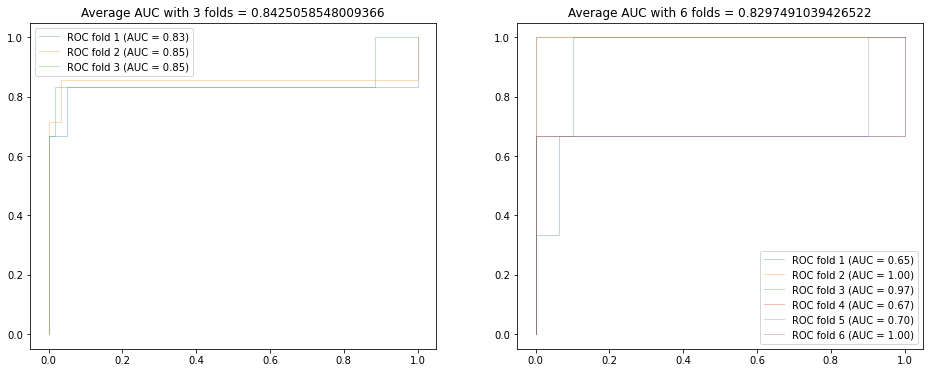

In [26]:
print("Test Accuracy Scores for each fold using the StratifiedKFold method:\n")

fig = plt.figure(figsize=(16,6))

for idx, fold in enumerate([3, 6]):
    print(f"\nTest Accuracy Scores with the StratifiedKFold method using {fold} folds:\n")
    # we declare our StratifiedKFold strategy
    cv = StratifiedKFold(n_splits=fold)
    i=0
    # Cross-validation loop: runs LDA with cross-validation and plot ROC curves
    # Loops over the cross-validation folds
    for train, test in cv.split(X, y):
        # Computes the predictions
        predictions = model.fit(X[train], y[train]).predict_proba(X[test])
        # Compute the ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y[test], predictions[:, 1])
        roc_sample[idx].append(np.interp(mean_fpr, fpr, tpr))
        # ROC curve is set to start at 0
        roc_sample[idx][-1][0] = 0.0
        # Compute the AUC
        roc_auc = auc(fpr, tpr)
        aucs[idx].append(roc_auc)
        # Plots the AUC
        plt.subplot(1,2,idx+1)
        plt.plot(fpr, tpr, 
                 lw=1, alpha=0.3,
                 label=f"ROC fold {i+1} (AUC = {roc_auc:.2f})")
        plt.legend()
        plt.title(f"Average AUC with {fold} folds = {np.mean(aucs[idx])}")
        i += 1
        # Prints the Accuracy score
        acc = accuracy_score(y[test], model.predict(X[test]))
        print(f"{i}-Fold Test Accuracy Score: {acc:.2f}")

print("\nAUC plot:")
    
plt.legend()
plt.show()

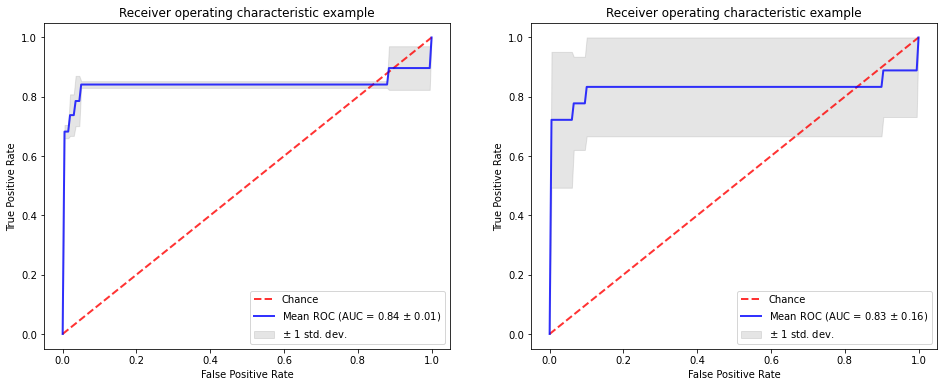

In [27]:
# Summarizes the cross-validation results

fig = plt.figure(figsize=(16,6))

for idx in [0, 1]:
    # Adds diagonal line of random classification 
    plt.subplot(1,2,idx+1)
    plt.plot([0, 1], 
             [0, 1], 
             linestyle='--', 
             lw=2, 
             color='r',
             label='Chance', 
             alpha=.8)

    # Computes mean and std for the curves
    mean_tpr = np.mean(roc_sample[idx], axis=0)
    std_tpr = np.std(roc_sample[idx], axis=0)

    # Sets the end point of the average ROC to be equal to 1
    mean_tpr[-1] = 1.0

    # Computes the AUC of the average curves
    mean_auc = auc(mean_fpr, mean_tpr)
    
    # Computes the std of the AUCs 
    std_auc = np.std(aucs[idx])
    
    # Plots the ROC curve
    plt.plot(mean_fpr, 
             mean_tpr, 
             color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, 
             alpha=.8)


    # Plots the std
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

plt.show()

## Assigments 3.2

__Exercise 1.__ During lesson we discussed the problem of _selection bias_ in cross-validation. 
This problem is nicely investigated in the paper *On the Dangers of Cross-Validation. An Experimental Evaluation*, accessible here:

http://people.csail.mit.edu/romer/papers/CrossVal_SDM08.pdf


Read  
- Section 1 (Introduction), 
- Section 4 (Experiments on Synthetic Data), 
- Section 7 (Discussion)

And write a short summary (~half a page) about these three sections (results and take home message).



In a general classification problem, the goal is to learn a
classifier that performs well on unseen data drawn from
the same distribution as the available data 1
; in other
words, to learn classifiers with good generalization. One
common way to estimate generalization capabilities is
to measure the performance of the learned classifier on
test data that has not been used to train the classifier.
When a large test data set cannot be held out or easily
acquired, resampling methods, such as cross validation,
are commonly used to estimate the generalization error. The resulting estimates of generalization can also
be used for model selection by choosing from various
possible classification algorithms (models) the one that
has the lowest cross validation error (and hence the lowest expected generalization error).
A strong argument in favor of using cross validation
is the potential of using the entire training set for
testing (albeit not at once), creating the largest possible
test set for a fixed training data set. Essentially,
the classifier is trained on a subset of the training
data set, and tested on the remainder. This process
is repeated systematically so that all the points in
the training set are tested. There has been much
study on the empirical behavior of cross-validation for
error estimation and model selection, and more recently
theoretical bounds on the error in the leave-one-out
cross-validation (loocv) estimate. Much of the focus
has been on the expected value of this error over all
training sets of a given sample size and the asymptotic
behavior as the sample size increases. In this paper we
empirically address the pitfalls of using cross validation
error to select among a large number of classification
algorithms.
Resampling methods, such as bootstrapping or
cross validation (Stone, 1977; Kohavi, 1995a; Weiss &
Kulikowski, 1991; Efron & Tibshirani, 1993) have typically been used to measure the generalization performance of a chosen algorithm, or possibly to select between a limited set of algorithms. Until the last decade,
cross validation experiments could reasonable be performed only on a small set of algorithms or possible
models; a k-fold or loocv run for a single algorithm,
even on a small dataset, typically ran for several hours,
if not days. As computers have become more powerful and due to recent advances regarding the computational efficiency of popular classification algorithms
and techniques (for example: linear training time for
SVMs (Joachims, 2006) and n log(n) kernel computation (Raykar & Duraiswami, 2005)), cross validation
performance can be quickly computed on several thousands or even millions of algorithms. Recent developments in grid computing now allow computers distributed in a large geographic area to be harnessed for a specific task, exponentially increasing the computing power
at hand.
It is a commonly held believe that cross validation,
like any other tool or metric, can be abused (Ng,
1997). Some basic heuristic procedures have been
employed to avoid these problems. For example, when
possible a sequestered test set is kept aside. This
set is finally used only after training to verify that
the chosen classifier indeed has superior generalization.
Any modeling decisions based upon experiments on the
training set, even cross validation estimates, are suspect,
until independently verified.
Despite certain general knowledge about the drawbacks attached to cross validation, there has not been a
sufficiently clear experimental (practical) investigation
on the behavior of the estimate of generalization error
for a fixed data set.
In this paper we provide an empirical reminder
of a fact that is known but usually underestimated:
when the set of algorithms to be considered becomes
large, cross validation is no longer a good measure
of generalization performance, and accordingly can no
longer be used for algorithm or feature selection. In
addition we experimentally show the impact of cross
validation as the data dimensionality increases and
for feature selection. We provide experimental results
on synthetic, standardized benchmark (from the UCI
repository), and a real-world dataset related to clinical
diagnosis in virtual colonoscopy.